# Monte Carlo Methods


Se usan principalmente para:

- Integrales
- Distribuciones estadisticas
- Optimización

Son muy comunes en areás como:

- Astronomia
- Fisica Nuclear
- Quimica
- Biofisica
- Ingeniería Financiera: https://github.com/olafSmits/MonteCarloMethodsInFinance


# ¿Por qué Monte Carlo?

In [ ]:
from IPython.display import Image
Image(filename='monte-carlo-tennis.jpg')

## Algo de Historia

- 1946, Primeros intentos de implementar el Metodo de Monte-Carlo, Ulam
- 1950, Se utilizan los metodos de Monte-Carlo en el proyecto Manhattan.

In [ ]:
Image(filename='800px-Real_Monte_Carlo_Casino.jpg')

# Ejemplo: Calcular $\pi\ \ $ usando Monte-Carlo

## Podemos hacer el siguiente analisis:
    
Si tenemos un circulo de radio R = 1.0, dentro de un cuadrado de lado L = 2*R, la relacion entre las areás sera:
    
$\dfrac{Area Circulo}{Area Cuadrado} = \dfrac{\pi * r^2}{4*r^2} = \dfrac{\pi}{4} $

Por lo tanto:

$\pi = 4 * \dfrac{Area Circulo}{Area Cuadrado}$

In [ ]:
#%pylab inline
import numpy as np
import matplotlib.pylab as plt

## Generemos numeros aleatorios en el intervalo x = [-1.0, 1.0], y = [-1.0, 1.0]

In [ ]:
x = np.random.rand(10000)*2 - 1
y = np.random.rand(10000)*2 - 1

(-1.0, 1.0)

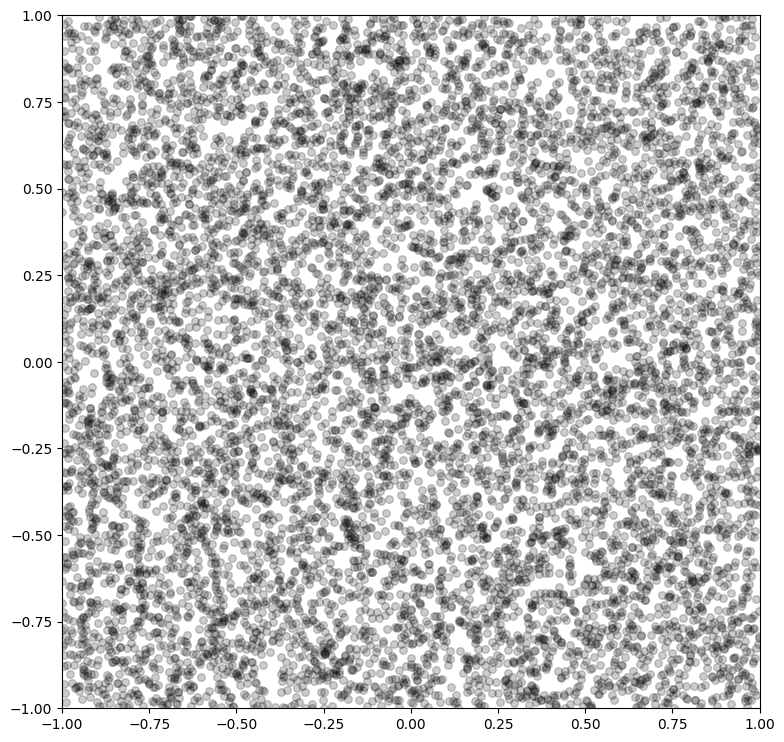

In [ ]:
plt.figure(figsize=(9, 9))
plt.scatter(x, y, alpha=0.2, s=30, c='k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)

## Seleccionemos los números que esten dentro de un circulo de radio R = 1

In [ ]:
index = np.where(x**2+y**2<1)

In [ ]:
xc = x[index]
yc = y[index]

(-1.0, 1.0)

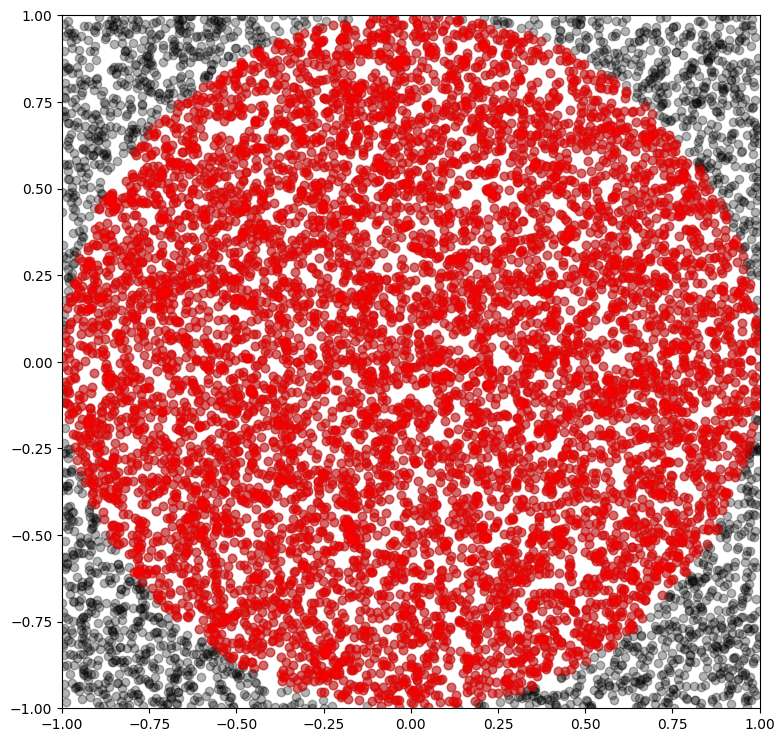

In [ ]:
plt.figure(figsize=(9,9))
plt.scatter(x,y, c='k', alpha=0.3)
plt.scatter(xc,yc, c='r', alpha=0.4, s=40)
plt.xlim(-1, 1)
plt.ylim(-1, 1)

In [ ]:
#xc: Numero de puntos dentro del circulo
#xL Numero de puntos totales.

In [ ]:
pi = 4* float(len(xc))/float(len(x))
print ("pi = " '%.16f' % pi)

pi = 3.1736000000000000


# Ejercicio:
 Calcular la integral:

$$ \int_{0}^{\infty} e^{-x^2} dx = \sqrt\pi $$

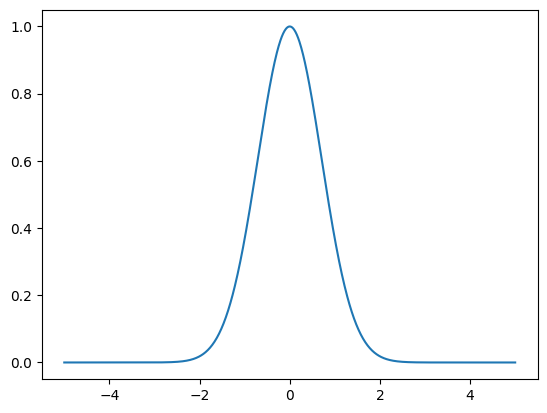

In [ ]:
# tomado de http://nbviewer.ipython.org/github/forero/ComputationalMethods/blob/master/notes/integration.ipynb
def my_gauss(x):
    return np.exp(-(x**2))
min_x = -5.0
max_x = 5.0
x = np.linspace(min_x, max_x ,1000)
gaussian = my_gauss(x)
plt.plot(x,gaussian)

In [ ]:
# esta funcion tiene los siguientes limites
min_y = 0.0
max_y = np.amax(gaussian)
print (min_y, max_y)

0.0 0.9999749502386504


## Ahora generamos 10000 números aleatorios

In [ ]:
n_random = 10000
random_x = np.random.rand(n_random) * (max_x - min_x) + min_x
random_y = np.random.rand(n_random) * (max_y - min_y) + min_y

(0.0, 1.0)

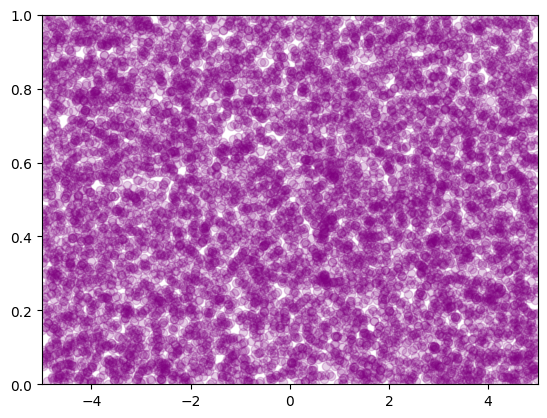

In [ ]:
plt.scatter(random_x, random_y, alpha=0.2, color = "purple")
plt.xlim(-5, 5)
plt.ylim(0, 1)

## Ahora seleccionamos todos los puntos que estan debajo de la gaussiana

(0.0, 1.1)

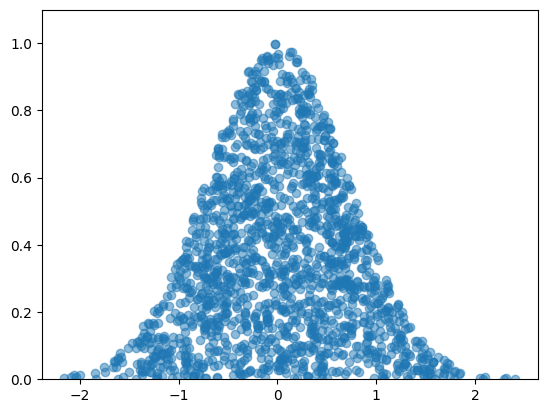

In [ ]:
index = np.where(my_gauss(random_x) - random_y > 0.0)
plt.scatter(random_x[index], random_y[index], alpha=0.5)
plt.ylim(0, 1.1)

El valor de la integral es la fracción de puntos bajo la curva.

In [ ]:
interval_integral = (max_y-min_y) * (max_x - min_x)
integral  = interval_integral * (np.size(index)/(1.0*np.size(random_y)))

#how many points are 'below'?
print ('dentro:', np.size(index), 'total:', np.size(random_y))
print('Valor de la integral:', integral)

dentro: 1725 total: 10000
Valor de la integral: 1.7249567891616717


## ¿Que tan bueno es este resultado?
Para esto comparemos con el valor de la integral usando scipy

In [ ]:
from scipy.integrate import quad
integral_scipy, err = quad(my_gauss, -5.0, 5.0)
print ("Integral con Monte-Carlo: ", integral)
print ("Integral con scipy: ", integral_scipy)
print ("Resultado Analitico ", np.sqrt(pi))

Integral con Monte-Carlo:  1.7249567891616717
Integral con scipy:  1.7724538509027912
Resultado Analitico  1.781460075331468


# Integración usando scipy.

In [ ]:
quad?

Recibe como argunmento la funcion a integral, y los intervalor de integración.
Documentacion http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.integrate.quad.html

In [ ]:
def sin_function(x):
    return np.sin(x)**4

In [ ]:
integral, error = quad(sin_function, 0, 2*np.pi)
integral

2.356194490192345

# Ejercicio:
## Calcular la integral de una Gaussiana en 6D

$$
\int_{0}^{\infty} e^{-r} dr = ...
$$

$$
r = x^2 + y^2 + z^2 + w^2 + k^2 + l^2
$$

Comparar con el valor teórico de esa integral

## Ayuda

### 2D integrals (usando Monte-Carlo)

We will follow the path of Monte-Carlo integration for highly dimensional integrals.

The principle is that to solve an integral in 2-D, we will generate a swarm of points in 3D within the intervals that we care: $x_{\rm min}, x_{\rm max}$, $y_{\rm min}$, $y_{\rm max}$, $f_{\rm min}(x,y)$ and $f_{\rm max}(x,y)$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
num_shots = 100000

x = np.random.rand((num_shots))*2-1
y = np.random.rand((num_shots))*2-1

plt.figure(figsize=(6,6))
plt.scatter(x,y, c='k', alpha=0.3)

In [ ]:
xc = x[np.where(x**2 + y**2 < 1)]
yc = y[np.where(x**2 + y**2 < 1)]

plt.figure(figsize=(6,6))
plt.scatter(x,y, c='k', alpha=0.3)
plt.scatter(xc, yc, c='r', alpha=0.3)

In [ ]:
pi_calculado = 4*(len(xc)/len(x))

pi_calculado

3.13632

In [ ]:
def f(x_param):
  return np.exp(-x_param**2)

x2 = np.linspace(-3, 3, 100)
y2 = f(x2)
print(x2, y2)
plt.plot(x2, y2)

In [ ]:
num_shots = 100000
x = np.random.rand(num_shots)*6 - 3
y = np.random.rand(num_shots)*2

index = np.where(y < f(x))

xc = x[index]
yc = y[index]

plt.figure(figsize=(6,6))
plt.scatter(x,y, c='k', alpha=0.3)
plt.scatter(xc, yc, c='r', alpha=0.3)

In [ ]:
integral_gauss = ( len(xc) / len(x) )* (2*6)

integral_gauss

1.76736

In [ ]:
np.random.rand()*2 - 1

-0.11406709869164322

In [ ]:
import numpy as np

np.random.seed(50)

num_shots = 10000
results = np.zeros((num_shots, 2))
for i in range(num_shots):
  results[i] = np.random.randint(1, 7, (2,))

len(np.where(results[:, 0] == results[:, 1])[0])/num_shots

0.1618

In [ ]:
1/6

0.16666666666666666